# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Customer Segmentation</p>

<img src="https://github.com/KarnikaKapoor/Files/blob/main/Colorful%20Handwritten%20About%20Me%20Blank%20Education%20Presentation.gif?raw=true">

In this final project, an unsupervised clustering will be performed on the customer's records extracted into [`online_retail.xlsx`](https://github.com/thuynh386/olist_ecommerce_dataset/blob/master/online_retail_II.xlsx?raw=true). 
   <a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Requirements</p>   
    
### 1. Import libraries

Import libraries that support the analysis and visualization of data, e.g. pandas, matplotlib, seaborn, sklearn, etc.

|Invoice|StockCode|	Description|	Quantity	|InvoiceDate|	Price|	Customer ID|	Country|
|-|-|	-|	-	|-|	-|	-|	-|
|0	|489434 |85048|	15CM CHRISTMAS GLASS BALL 20 LIGHTS	12	|2009-12-01 07:45:00	|6.95	|13085.0	|United Kingdom|
|1	|489434 |79323P|	PINK CHERRY LIGHTS	12|	2009-12-01 07:45:00|	6.75|	13085.0|	United Kingdom|

### 2. Load datasets

The dataset can be accessed [here](https://github.com/thuynh386/olist_ecommerce_dataset/blob/master/online_retail_II.xlsx?raw=true) and can be loaded from excel using pandas.
Further analysis can be performed on the dataset to discover the relationship between the features and the problem of features.
E.g:
- How many customers are there in the dataset?
- Describe the dataset with the necessary information?
- Is there any abnormal type for each feature?
- How many unique values are there in each feature?
- How many missing values are there in each feature?
- Are there any outliers in each feature?
    
### 3. Data cleaning and preprocessing 
- Remove the outliers if any.
- Remove the missing values if any.
- Convert the date to datetime format.
- Convert the quantity to numeric.
- Convert the customer id to string.
- Remove the duplicates and test data where StockCode is 'TEST' or 'M'.

### 4. Data visualization and analysis
- Visualize the data with the help of matplotlib and seaborn for the above analysis.

### 5. Feature creation
Create new features from the existing features to capture the RFM (Recency, Frequency, Monetary) of the customer.
- Create `StockValue` feature, which is the product of `Quantity` and `Price`.
- Create `Recency` feature, which is the difference between `InvoiceDate` and `InvoiceDate` of the last invoice.
- Create `Frequency` feature, which is the number of invoices of the customer.
- Create `Monetary` feature, which is the sum of `StockValue` of the invoices.
Make sure that the features are in the same scale in the dataset with no missing values or outliers.
    
### 6. Clustering with suitable algorithm
Perform clustering on the dataset using the algorithm that is suitable for the problem. E.g Kmeans, GMM, DBSCAN, etc.
In terms of K-means, make sure to find the optimal number of clusters using the elbow method.
Visualize the clusters using the above analysis. Examine the clusters formed via scatter plot.

### 7. Evaluate the clustering results and conclusion of the analysis (Important)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

2. Load dataset

In [3]:
sheet1 = pd.read_excel('online_retail.xlsx', sheet_name='Year 2009-2010')
sheet2 = pd.read_excel('online_retail.xlsx', sheet_name='Year 2010-2011')

In [4]:
print(sheet1.shape)
print(sheet2.shape)
print('Total of rows after combining two sheets: ', sheet1.shape[0] + sheet2.shape[0])

(525461, 8)
(541910, 8)
Total of rows after combining two sheets:  1067371


In [5]:
data = pd.concat([sheet1,sheet2], ignore_index=True)

In [6]:
data.shape

(1067371, 8)

In [7]:
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 65.1+ MB


-> null: description, customerID
-> customerID -> string

In [9]:
data.isnull().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

In [10]:
pd.DataFrame(data.isna().sum()/len(data)*100).T

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,0.0,0.0,0.410541,0.0,0.0,0.0,22.766873,0.0


In [11]:
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [12]:
customer_no = data['Customer ID'].nunique()
print('Tong so luong khach hang: ',customer_no)

Tong so luong khach hang:  5942


In [13]:
data.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,1.067371e+06,1067371,1.067371e+06,824364.000000
mean,9.938898e+00,2011-01-02 21:13:55.394028544,4.649388e+00,15324.638504
min,-8.099500e+04,2009-12-01 07:45:00,-5.359436e+04,12346.000000
25%,1.000000e+00,2010-07-09 09:46:00,1.250000e+00,13975.000000
50%,3.000000e+00,2010-12-07 15:28:00,2.100000e+00,15255.000000
75%,1.000000e+01,2011-07-22 10:23:00,4.150000e+00,16797.000000
max,8.099500e+04,2011-12-09 12:50:00,3.897000e+04,18287.000000
std,1.727058e+02,NaN,1.235531e+02,1697.464450


In [14]:
data[data['Price']<0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.36,NaN,United Kingdom
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.79,NaN,United Kingdom
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.87,NaN,United Kingdom
825444,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
825445,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


In [15]:
data[data['Quantity']<0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
...,...,...,...,...,...,...,...,...
1065910,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
1067002,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
1067176,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
1067177,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [16]:
pd.DataFrame(data.nunique()).T.rename(index = {0: 'Number of unique values'})

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
Number of unique values,53628,5305,5698,1057,47635,2807,5942,43


<Axes: >

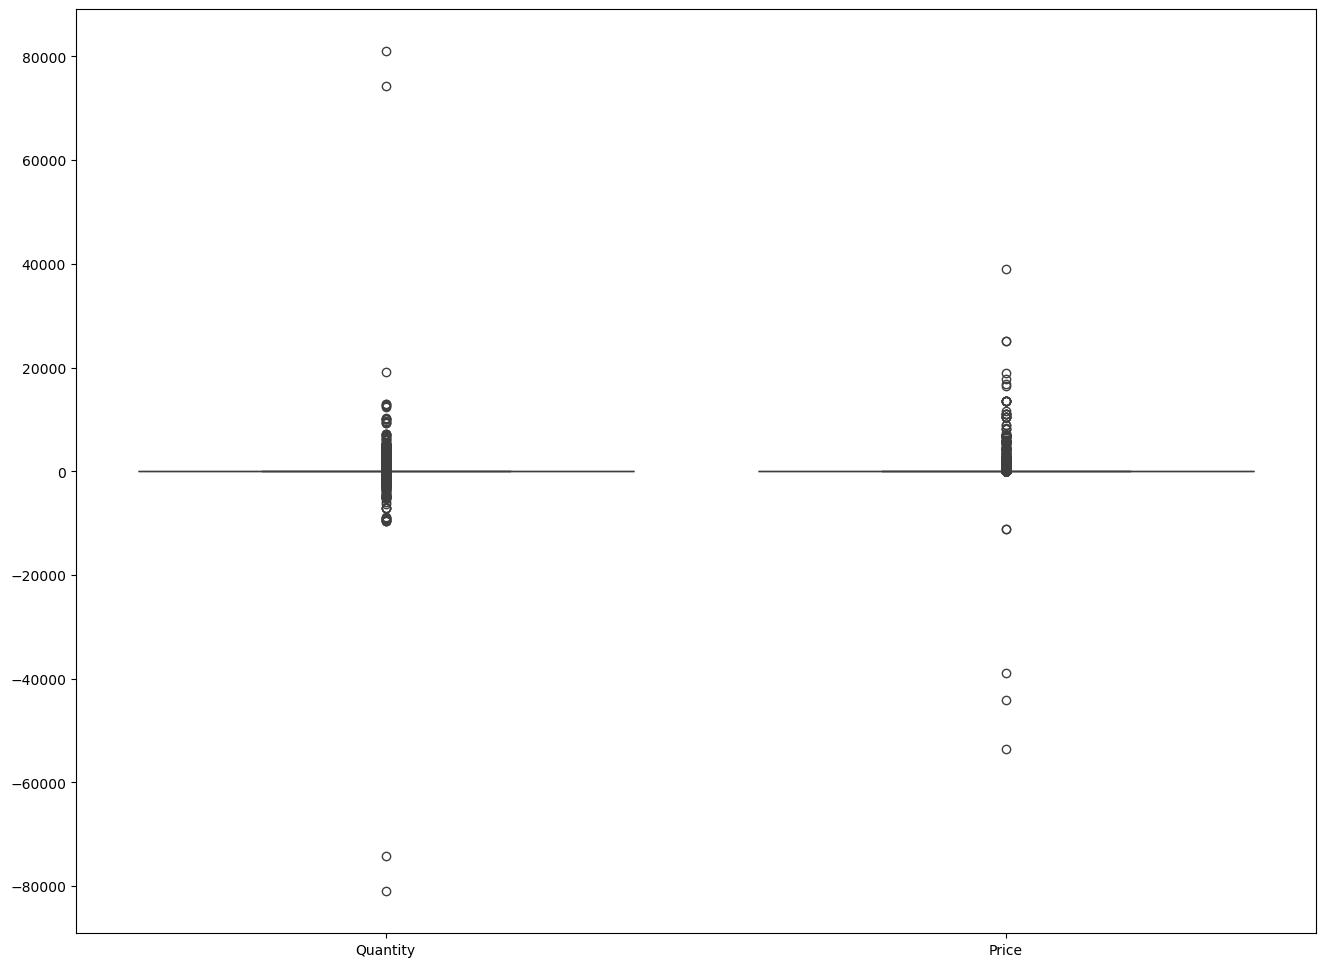

In [17]:
plt.figure(figsize = (16,12))
sns.boxplot(data=data.select_dtypes(include=['int64','float64']).drop('Customer ID',axis=1))

In [18]:
data[data['StockCode'].isin(['TEST','M'])]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
2697,489609,M,Manual,1,2009-12-01 14:50:00,4.00,NaN,United Kingdom
3053,C489651,M,Manual,-1,2009-12-01 16:48:00,5.10,17804.0,United Kingdom
5897,C489859,M,Manual,-1,2009-12-02 14:45:00,69.57,NaN,United Kingdom
9259,C490126,M,Manual,-1,2009-12-03 18:12:00,5.95,15884.0,United Kingdom
9307,C490129,M,Manual,-1,2009-12-03 18:26:00,1998.49,15482.0,United Kingdom
...,...,...,...,...,...,...,...,...
1056893,580956,M,Manual,4,2011-12-06 14:23:00,1.25,17841.0,United Kingdom
1058543,C581009,M,Manual,-1,2011-12-07 09:15:00,125.00,16971.0,United Kingdom
1059769,C581145,M,Manual,-1,2011-12-07 13:48:00,9.95,17490.0,United Kingdom
1063782,581405,M,Manual,3,2011-12-08 13:50:00,0.42,13521.0,United Kingdom


In [19]:
data.duplicated().sum()

np.int64(34335)

# Data Cleaning

In [20]:
data2 = data
data2 = data2[~data['StockCode'].isin(['TEST','M'])]
data2 = data2.drop_duplicates()
data2 = data2[data2['Quantity']>=0]
data2 = data2[data2['Price']>=0]
# data2['Customer ID'] = data2['Customer ID'].astype('int64')
# data2['Customer ID'] = data2['Customer ID'].astype('str')
data2.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [25]:
data2[data2['Quantity']<0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country


In [21]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1009681 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1009681 non-null  object        
 1   StockCode    1009681 non-null  object        
 2   Description  1008039 non-null  object        
 3   Quantity     1009681 non-null  int64         
 4   InvoiceDate  1009681 non-null  datetime64[ns]
 5   Price        1009681 non-null  float64       
 6   Customer ID  778807 non-null   float64       
 7   Country      1009681 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 69.3+ MB


In [22]:
data2 = data2.dropna(subset = ['Customer ID'])
data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 778807 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      778807 non-null  object        
 1   StockCode    778807 non-null  object        
 2   Description  778807 non-null  object        
 3   Quantity     778807 non-null  int64         
 4   InvoiceDate  778807 non-null  datetime64[ns]
 5   Price        778807 non-null  float64       
 6   Customer ID  778807 non-null  float64       
 7   Country      778807 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 53.5+ MB


In [23]:
data2['Customer ID'] = data2['Customer ID'].astype('str')
data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 778807 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      778807 non-null  object        
 1   StockCode    778807 non-null  object        
 2   Description  778807 non-null  object        
 3   Quantity     778807 non-null  int64         
 4   InvoiceDate  778807 non-null  datetime64[ns]
 5   Price        778807 non-null  float64       
 6   Customer ID  778807 non-null  object        
 7   Country      778807 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 53.5+ MB


In [24]:
q3 = data2['Quantity'].quantile(0.75)
q1 = data2['Quantity'].quantile(0.25)

iqr = q3 - q1

upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr

print(lower_limit, upper_limit)

-13.0 27.0


In [28]:
data2['Quantity_new'] = pd.DataFrame(
    np.where(data2['Quantity'] > upper_limit, upper_limit,
    np.where(data2['Quantity'] < lower_limit, lower_limit,
    data2['Quantity']))
)
# data2['Quantity_new'] = data2['Quantity_new'].astype('int64')
data2.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Quantity_new
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,12.0
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,12.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,12.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,27.0
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,24.0
